<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# A:
house.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
673,674,20,RL,110.0,14442,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,257500
1030,1031,190,RH,NaN,7082,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,160000
360,361,85,RL,NaN,7540,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,156000
285,286,160,FV,35.0,4251,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,164700
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
768,769,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,216837
562,563,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,108000


# Cleaning the Dataframe

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [6]:
# check for null values and replace them with proper variables
for x in list(house.columns):
    if house[x].isnull().sum() > 0:
        print x +':', house[x].isnull().sum()
     

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [7]:
# replaces NaN with 'no_alley' as NaN means no alley.
house['Alley']=house['Alley'].fillna('No_alley')
# replaces NaN with 'No_Bsmt' as NaN means no basement.
house['BsmtQual']=house['BsmtQual'].fillna('No_Bsmt')
# replaces NaN with 'No_Bsmt' as NaN means no basement.
house['BsmtCond']=house['BsmtCond'].fillna('No_Bsmt')
# replaces NaN with 'No_Bsmt' as NaN means no basement.
house['BsmtExposure']=house['BsmtExposure'].fillna('No_Bsmt') 
# check for null values and replace them with proper variables
house['BsmtFinType1']=house['BsmtFinType1'].fillna('No_Bsmt') 
house['BsmtFinType2']=house['BsmtFinType2'].fillna('No_Bsmt') 
house['FireplaceQu']=house['FireplaceQu'].fillna('No_Fireplce') 
house['GarageType']=house['GarageType'].fillna('No_Garage')
house['GarageFinish']=house['GarageFinish'].fillna('No_Garage')
house['GarageQual']=house['GarageQual'].fillna('No_Garage')
house['GarageCond']=house['GarageCond'].fillna('No_Garage')
house['PoolQC']=house['PoolQC'].fillna('No_Pool')
house['Fence']=house['Fence'].fillna('No_Fence')
house['MiscFeature']=house['MiscFeature'].fillna('None')
house['MasVnrType'].fillna('None',inplace=True)
house['Electrical'].fillna('None',inplace=True)
house['MasVnrArea'].fillna(value = 0,inplace=True)

In [8]:
#Be sure to remove any houses that are not residential from the dataset.
# C(all) are commercial property
house['MSZoning'].unique()

#dropping "C (all) rows"
house.drop(house[house['MSZoning'] =='C (all)'].index.values, inplace= True)

#dropping ID columns

house.drop('Id',axis=1,inplace=True)

In [9]:
# inspect the properties of "lotfrontage"
print house['LotFrontage'].describe()
print '-'*30
print 'median = ',house['LotFrontage'].median()

count    1191.000000
mean       70.052897
std        24.301013
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
------------------------------
median =  70.0


In [10]:
# fill null values of LotFrontage with mean.
house['LotFrontage'].fillna(house['LotFrontage'].median(),inplace=True)

C:\Users\ASUS\Anaconda3\envs\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


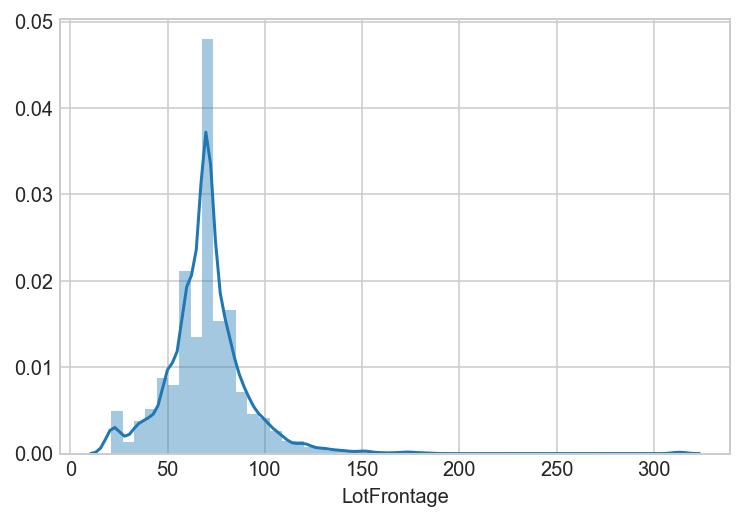

In [11]:
sns.distplot(house['LotFrontage'])

In [12]:
# inspect the properties of "lotfrontage"
print house['GarageYrBlt'].describe()
print '-'*30
print 'median = ',house['GarageYrBlt'].median()

count    1371.000000
mean     1978.627279
std        24.592779
min      1906.000000
25%      1961.500000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
------------------------------
median =  1980.0


In [13]:
# fill null values of LotFrontage with mean.
house['GarageYrBlt'].fillna(house['GarageYrBlt'].mean(),inplace=True)

C:\Users\ASUS\Anaconda3\envs\python2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


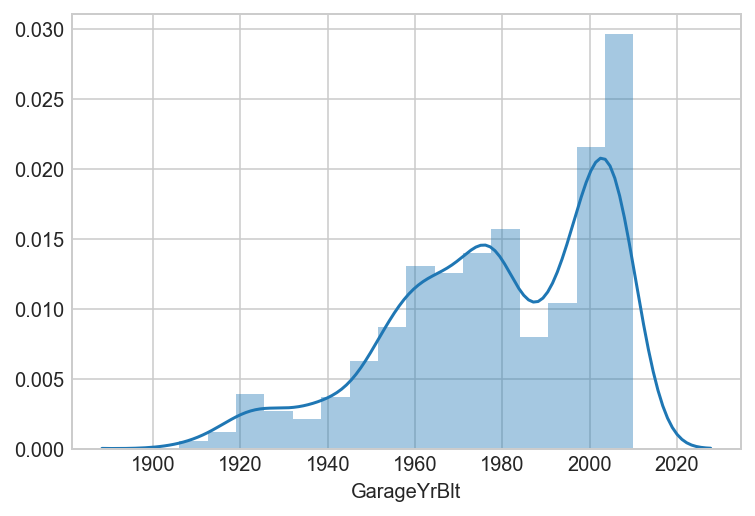

In [14]:
sns.distplot(house['GarageYrBlt'])

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1450 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            1450 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
RoofMatl         1450 non-null object
Exterior1st      1450 non-null object
Exterior2nd      1450 no

In [16]:
# test for any other null values:
for x in list(house.columns):
    if house[x].isnull().sum() > 0:
        print x
        
#no more null values, data is cleaned from null values

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.

   020    1-STORY 1946 & NEWER ALL STYLES
   030    1-STORY 1945 & OLDER
   040    1-STORY W/FINISHED ATTIC ALL AGES
   045    1-1/2 STORY - UNFINISHED ALL AGES
   050    1-1/2 STORY FINISHED ALL AGES
   060    2-STORY 1946 & NEWER
   070    2-STORY 1945 & OLDER
   075    2-1/2 STORY ALL AGES
   080    SPLIT OR MULTI-LEVEL
   085    SPLIT FOYER
   090    DUPLEX - ALL STYLES AND AGES
   120    1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150    1-1/2 STORY PUD - ALL AGES
   160    2-STORY PUD - 1946 & NEWER
   180    PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190    2 FAMILY CONVERSION - ALL STYLES AND AGES

In [17]:
#Change Values to prepare dataframe for dummie variable transformation.
#MS SubClass (Nominal): Identifies the type of dwelling involved in the sale. 

house['MSSubClass'].replace(20,'1-STORY 1946 & NEWER ALL STYLES',inplace = True)
house['MSSubClass'].replace(30,'1-STORY 1945 & OLDER',inplace = True)
house['MSSubClass'].replace(40,'1-STORY W/FINISHED ATTIC ALL AGES',inplace = True)
house['MSSubClass'].replace(45,'1-1/2 STORY - UNFINISHED ALL AGES',inplace = True)
house['MSSubClass'].replace(50,'1-1/2 STORY FINISHED ALL AGES',inplace = True)
house['MSSubClass'].replace(60,'2-STORY 1946 & NEWER',inplace = True)
house['MSSubClass'].replace(70,'2-STORY 1945 & OLDER',inplace = True)
house['MSSubClass'].replace(75,'2-1/2 STORY ALL AGES',inplace = True)
house['MSSubClass'].replace(80,'SPLIT OR MULTI-LEVEL',inplace = True)
house['MSSubClass'].replace(85,'SPLIT FOYER',inplace = True)
house['MSSubClass'].replace(90,'DUPLEX - ALL STYLES AND AGES',inplace = True)
house['MSSubClass'].replace(120,'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',inplace = True)
house['MSSubClass'].replace(150,'1-1/2 STORY PUD - ALL AGES',inplace = True)
house['MSSubClass'].replace(160,'2-STORY PUD - 1946 & NEWER',inplace = True)
house['MSSubClass'].replace(180,'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',inplace = True)
house['MSSubClass'].replace(190,'2 FAMILY CONVERSION - ALL STYLES AND AGES',inplace = True)


In [18]:
#spilt the data to fix and not_fixed features 

non_fixed_str = 'Exterior1st Exterior2nd OverallQual OverallCond RoofStyle RoofMatl MasVnrType MasVnrArea ExterQual ExterCond BsmtQual BsmtCond BsmtFinType1 BsmtFinSF1 BsmtFinType2 BsmtFinSF2 BsmtUnfSF Heating HeatingQC CentralAir Electrical LowQualFinSF BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr KitchenQual FireplaceQu GarageFinish GarageQual GarageCond PoolQC Fence'
non_fixed=  non_fixed_str.split()
print non_fixed
fixed = [x for x in list(house.columns) if x not in non_fixed]
print fixed

['Exterior1st', 'Exterior2nd', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'Foundation', 'BsmtExposure', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolA

In [19]:
print 'Shape:',house[fixed].shape
print "-"*30
print house[fixed].info() 

Shape: (1450, 45)
------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 45 columns):
MSSubClass       1450 non-null object
MSZoning         1450 non-null object
LotFrontage      1450 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            1450 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
Foundation       1450 non-null object
BsmtExposure     1450 non-null object
TotalBsmtSF      1450 non-null int64
1stFlrSF         1450 non-null int64
2ndFlrSF    

In [20]:
#split the fixed data into continuous or categorical data set and then adjusting some features to move to the right columns
house_fix=house[fixed]

cat_columns =list(pd.DataFrame(house_fix.dtypes[house_fix.dtypes =='object']).index.values)
cat_columns.extend(['YearBuilt','YearRemodAdd','MoSold','YrSold'])
continuous_columns =list(pd.DataFrame(house_fix.dtypes[house_fix.dtypes !=  'object']).index.values)
continuous_columns = [e for e in continuous_columns if e not in ('YearBuilt','YearRemodAdd','MoSold','YrSold')]

In [21]:
# join dummy variables and continuous data to a new dataframe called house_cleaned
house_cleaned = pd.concat([pd.get_dummies(house[cat_columns]), house[continuous_columns]], axis=1, sort=False)

In [22]:
#split by pre and post 2010
house_pre2010 = house_cleaned[house_cleaned['YrSold']< 2010]
house_post2010 = house_cleaned[house_cleaned['YrSold']> 2009]

In [23]:
train_house = house_pre2010
test_house = house_post2010

In [24]:
#spitting data to X train/test and Y train/test
from sklearn.preprocessing import StandardScaler

cols = list(train_house.columns)
cols.remove('SalePrice')

#Training Data:
X = pd.DataFrame(StandardScaler().fit_transform(train_house[cols]), columns =cols )
y = train_house['SalePrice'].values

# Test Data 
Test_X = pd.DataFrame(StandardScaler().fit_transform(test_house[cols]), columns =cols )
Test_y = test_house['SalePrice'].values


# Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest,f_classif

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=10)

# Train the selector on the data.
skb_f.fit(X, y)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_)], 
                     index=['feature','f_classif']).T.sort_values('f_classif', ascending=False)
kbest

C:\Users\ASUS\Anaconda3\envs\python2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,feature,f_classif
86,Condition2_RRAn,inf
136,SaleType_Con,inf
145,SaleCondition_Alloca,16.952
140,SaleType_New,5.20833
148,SaleCondition_Partial,4.79035
62,Neighborhood_NridgHt,4.75843
166,MiscVal,3.83892
61,Neighborhood_NoRidge,3.46727
154,GrLivArea,3.33239
84,Condition2_PosN,3.30446


In [26]:
#Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(X, y)

print selector.support_
print selector.ranking_

[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False  True  True False False False False False False False False
 False False False False False False  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [27]:
# The column names correspond to the ones below. RFECV only excluded a few features.
rfecv_columns = np.array(cols)[selector.support_]
rfecv_columns

array(['Street_Grvl', 'Alley_Grvl', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_No', 'BsmtExposure_No_Bsmt', 'PavedDrive_N',
       'PavedDrive_P', 'PavedDrive_Y'], dtype='|S64')

In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
#optimal alpha Lasso model CV scores
optimal_lasso = LassoCV(n_alphas=500, cv=10) #LassoCV decide what alphas to use, just set no. of alphas to test.
optimal_lasso.fit(X, y)
print optimal_lasso.alpha_

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X, y, cv=10)
print lasso_scores
print np.mean(lasso_scores)

#Lasso feature selection/variable selection alternative
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso = lasso.fit(X, y)
lasso_coefs = pd.DataFrame({'Feature': X.columns,
                            'coef':lasso.coef_,
                           'abs_coef':np.abs(lasso.coef_)})


lasso_coefs.sort_values('abs_coef', ascending=False)

1278.9681972805126
[0.87887343 0.85757578 0.85341051 0.76017358 0.82055008 0.7389545
 0.85054052 0.80833221 0.53602862 0.85838009]
0.7962819315072732


,Feature,abs_coef,coef
154,GrLivArea,30501.323406,30501.323406
62,Neighborhood_NridgHt,13672.555976,13672.555976
61,Neighborhood_NoRidge,9293.148514,9293.148514
158,GarageCars,9216.572044,9216.572044
0,YearBuilt,8498.982456,8498.982456
68,Neighborhood_StoneBr,7930.557317,7930.557317
1,YearRemodAdd,7428.265788,7428.265788
151,TotalBsmtSF,7174.188999,7174.188999
108,BsmtExposure_Gd,6487.313328,6487.313328
88,BldgType_1Fam,5872.394476,5872.394476


In [29]:
kbest_columns = kbest.feature.values[2:20]
lasso_columns = list(lasso_coefs[lasso_coefs.abs_coef > 0]['Feature'])

In [30]:
len(lasso_columns)

54

In [31]:

# optimal_lasso = LassoCV(n_alphas=500, cv=10) #LassoCV decide what alphas to use, just set no. of alphas to test.
# optimal_lasso.fit(X, y)
# lasso = Lasso(alpha=optimal_lasso.alpha_)
import sklearn.linear_model as linear_model
lm = linear_model.LinearRegression()
# lm_scores = cross_val_score(lm, X, y, cv=10)

# Defining a function to test our best features head to head.
def score(X):
    lm_scores = cross_val_score(lm, X, y, cv=10)
    return lm_scores.mean(), lm_scores.std() 

# A list of all of our lists of best features being executed in the score function.
all_scores = [
    score(X[kbest_columns]),
    score(X[rfecv_columns]),
    score(X[lasso_columns]),
    score(X)]  
# Putting results into a DataFrame.

pd.DataFrame(all_scores, columns=['mean score', 'std score'], index = ['kbest', 'rfecv', 'lr', 'all']) 

,mean score,std score
kbest,6.895526e-01,1.148018e-01
rfecv,1.586422e-01,1.015913e-01
lr,-3.111890e+13,9.335671e+13
all,-2.864703e+25,4.195221e+25


In [32]:
#Applying Feature Elimination Using the Lasso Penalty
#Apply lasso
# #Setting alpha to 0 will be equal to ordinary least squares,hence i should achieve the same result.Apply best alpha after gridsearch
optimal_lasso = LassoCV(n_alphas=500, cv=10) #LassoCV decide what alphas to use, just set no. of alphas to test.
optimal_lasso.fit(X[lasso_columns], y)
ls = Lasso(alpha = optimal_lasso.alpha_)

#10 cross-validation on lasso
lsscore = cross_val_score(ls, X[lasso_columns], y, cv= 10)
print '10 fold Training accuracy scores: ',lsscore, 'Mean: ', lsscore.mean()


#Perform the prediction
ls.fit(X[lasso_columns],y)
predictions_m1_test = ls.predict(Test_X[lasso_columns])
predictions_m1_train = ls.predict(X[lasso_columns])
#Get the score of prediction
print 'Predicted R2 scores:', ls.score(Test_X[lasso_columns],Test_y)

10 fold Training accuracy scores:  [0.87979319 0.86338343 0.85762343 0.7607218  0.82823138 0.72142845
 0.85461606 0.80654858 0.55021985 0.86293064] Mean:  0.7985496805681891
Predicted R2 scores: 0.870734012702162


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [33]:
house_nonfix = house[non_fixed]

In [34]:
house_nonfix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 35 columns):
Exterior1st     1450 non-null object
Exterior2nd     1450 non-null object
OverallQual     1450 non-null int64
OverallCond     1450 non-null int64
RoofStyle       1450 non-null object
RoofMatl        1450 non-null object
MasVnrType      1450 non-null object
MasVnrArea      1450 non-null float64
ExterQual       1450 non-null object
ExterCond       1450 non-null object
BsmtQual        1450 non-null object
BsmtCond        1450 non-null object
BsmtFinType1    1450 non-null object
BsmtFinSF1      1450 non-null int64
BsmtFinType2    1450 non-null object
BsmtFinSF2      1450 non-null int64
BsmtUnfSF       1450 non-null int64
Heating         1450 non-null object
HeatingQC       1450 non-null object
CentralAir      1450 non-null object
Electrical      1450 non-null object
LowQualFinSF    1450 non-null int64
BsmtFullBath    1450 non-null int64
BsmtHalfBath    1450 non-null int64
FullBath    

In [35]:

cat_columns_nonfix =list(pd.DataFrame(house_nonfix.dtypes[house_nonfix.dtypes =='object']).index.values)
continuous_columns_nonfix =list(pd.DataFrame(house_nonfix.dtypes[house_nonfix.dtypes !=  'object']).index.values)
continuous_columns_nonfix.extend(['SalePrice','YrSold'])

In [36]:
# join dummy variables and continuous data to a new dataframe called house_cleaned
house_cleaned_nonfix = pd.concat([pd.get_dummies(house[cat_columns_nonfix]), house[continuous_columns_nonfix]], axis=1, sort=False)

In [37]:
house_cleaned_nonfix.shape

(1450, 151)

In [38]:
#split by pre and post 2010
house_pre2010_nonfix = house_cleaned_nonfix[house_cleaned_nonfix['YrSold']< 2010]
house_post2010_nonfix = house_cleaned_nonfix[house_cleaned_nonfix['YrSold']> 2009]

In [39]:
train_house_nonfix = house_pre2010_nonfix
print train_house_nonfix.shape
test_house_nonfix = house_post2010_nonfix
print test_house_nonfix.shape

(1278, 151)
(172, 151)


In [40]:
#spitting data to X train/test and Y train/test
from sklearn.preprocessing import StandardScaler

cols = list(train_house_nonfix.columns)
cols.remove('SalePrice')

#Training Data:
X1 = pd.DataFrame(StandardScaler().fit_transform(train_house_nonfix[cols]), columns =cols )
y1 = train_house_nonfix['SalePrice'].values

# Test Data 
Test_X1 = pd.DataFrame(StandardScaler().fit_transform(test_house_nonfix[cols]), columns =cols )
Test_y1 = test_house_nonfix['SalePrice'].values

In [41]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
#optimal alpha Lasso model CV scores
optimal_lasso_nonfix = LassoCV(n_alphas=500, cv=10) #LassoCV decide what alphas to use, just set no. of alphas to test.
optimal_lasso_nonfix.fit(X1, y1)
print optimal_lasso_nonfix.alpha_

lasso_nonfix = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores_nonfix = cross_val_score(lasso_nonfix, X1, y1, cv=10)
print lasso_scores_nonfix
print np.mean(lasso_scores_nonfix)

#Lasso feature selection/variable selection alternative
lasso_nonfix = Lasso(alpha=optimal_lasso.alpha_)
lasso_nonfix = lasso_nonfix.fit(X1, y1)
lasso_coefs_nonfix = pd.DataFrame({'Feature': X1.columns,
                            'coef':lasso_nonfix.coef_,
                           'abs_coef':np.abs(lasso_nonfix.coef_)})


lasso_coefs_nonfix.sort_values('coef', ascending=False,inplace = True)
lasso_coefs_nonfix

1175.6734406902538
[0.84101908 0.73972796 0.87642342 0.70090363 0.82073706 0.81850651
 0.85250691 0.78099416 0.54571673 0.84521229]
0.7821747747457148


,Feature,abs_coef,coef
139,BsmtFinSF1,2.354923e+04,2.354923e+04
136,OverallQual,1.924910e+04,1.924910e+04
141,BsmtUnfSF,1.415901e+04,1.415901e+04
145,FullBath,1.164629e+04,1.164629e+04
58,BsmtQual_Ex,1.019233e+04,1.019233e+04
146,HalfBath,8.721398e+03,8.721398e+03
138,MasVnrArea,8.088920e+03,8.088920e+03
101,KitchenQual_Ex,6.696082e+03,6.696082e+03
137,OverallCond,6.311357e+03,6.311357e+03
44,RoofMatl_WdShngl,5.984435e+03,5.984435e+03


In [42]:
# finding lasso columns
lasso_columns1 = list(lasso_coefs_nonfix[lasso_coefs_nonfix.abs_coef > 0]['Feature'])

In [43]:
lasso_coefs_nonfix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 139 to 37
Data columns (total 3 columns):
Feature     150 non-null object
abs_coef    150 non-null float64
coef        150 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


In [44]:
# interpreting the data
lasso_coefs_nonfix['std']=[train_house_nonfix[x].std() for x in lasso_coefs_nonfix['Feature']]
lasso_coefs_nonfix['Price_increase_per_unit'] = lasso_coefs_nonfix['coef']/lasso_coefs_nonfix['std']


In [45]:
# sorting the list from most important to least
lasso_coefs_nonfix.isnull().sum()

Feature                    0
abs_coef                   0
coef                       0
std                        0
Price_increase_per_unit    2
dtype: int64

In [46]:
lasso_coefs_nonfix.fillna(0, inplace = True)
# changing the Price number to 2 decimal points
lasso_coefs_nonfix['Price_increase_per_unit']=lasso_coefs_nonfix['Price_increase_per_unit'].apply(lambda x: '%.2f' % x)

# changing to float
lasso_coefs_nonfix['Price_increase_per_unit']= lasso_coefs_nonfix['Price_increase_per_unit'].astype(float)

In [47]:
top_30_reno = lasso_coefs_nonfix.sort_values('Price_increase_per_unit', ascending=False).head(30)
top_30_reno

,Feature,abs_coef,coef,std,Price_increase_per_unit
127,PoolQC_Ex,4607.696716,4607.696716,0.039544,116521.06
44,RoofMatl_WdShngl,5984.435409,5984.435409,0.068385,87511.45
58,BsmtQual_Ex,10192.327043,10192.327043,0.280580,36325.91
101,KitchenQual_Ex,6696.082488,6696.082488,0.257268,26027.69
39,RoofMatl_Membran,725.815051,725.815051,0.027973,25947.25
10,Exterior1st_Stone,1000.287312,1000.287312,0.039544,25295.62
61,BsmtQual_No_Bsmt,3502.185315,3502.185315,0.156305,22406.09
145,FullBath,11646.290866,11646.290866,0.550313,21163.03
22,Exterior2nd_ImStucc,1659.659857,1659.659857,0.083655,19839.37
24,Exterior2nd_Other,539.862265,539.862265,0.027973,19299.60


In [48]:
top_30_reno.sort_values('Feature', ascending=False)

,Feature,abs_coef,coef,std,Price_increase_per_unit
31,RoofStyle_Flat,721.225069,721.225069,0.100382,7184.80
44,RoofMatl_WdShngl,5984.435409,5984.435409,0.068385,87511.45
40,RoofMatl_Metal,88.894100,88.894100,0.027973,3177.89
39,RoofMatl_Membran,725.815051,725.815051,0.027973,25947.25
129,PoolQC_Gd,495.546433,495.546433,0.048412,10235.98
127,PoolQC_Ex,4607.696716,4607.696716,0.039544,116521.06
136,OverallQual,19249.103757,19249.103757,1.380794,13940.61
137,OverallCond,6311.356957,6311.356957,1.101874,5727.84
101,KitchenQual_Ex,6696.082488,6696.082488,0.257268,26027.69
84,Heating_GasW,163.288917,163.288917,0.114610,1424.74


In [49]:
# try to elimate features which are not statistically significantly 
import statsmodels.api as sm

model = sm.OLS(y1, X1[lasso_columns1])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     3.017
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           2.43e-13
Time:                        01:38:30   Log-Likelihood:                -17310.
No. Observations:                1278   AIC:                         3.475e+04
Df Residuals:                    1215   BIC:                         3.507e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BsmtFinSF1               2


Odd results:

75	BsmtFinType2_ALQ	16986.097 


70	BsmtFinType1_GLQ   : 2941.977

    Basement finishing type average is valued more than good quality.

----------------------------------------------------------------------------

Typical results:

44	RoofMatl_WdShngl	:    87511.450


40	RoofMatl_Metal	   	:     3177.886


39	RoofMatl_Membran	:     25947.254

    for eg. RoofMatl_WdShngl is the most desirable roof material.
    
28	Exterior2nd_VinylSd	:     2153.624


24	Exterior2nd_Other	:     19299.604


22	Exterior2nd_ImStucc	:     19839.371
    
    for eg. Exterior2nd_ImStucc is the most desirable Exterior.

10	Exterior1st_Stone	:      25295.618

3	Exterior1st_BrkFace	:     17456.591

    for eg. Exterior1st_Stone is the most desirable Exterior material.
    
117	GarageQual_Gd	:     5485.605


115	GarageQual_Ex	:    12843.123
    
    for eg. GarageQual_Ex is the most desirable GarageQual.

----------------------------------------------------------------------------

    How would your company use this second model and its coefficients to determine whether they should buy a property or not?
    Explain how the company can use the two models you have built to determine if they can make money.

1) first determine if the property in the market is undervalued or valued at the right price, using the first and second model to predict the price of target property.

2) identify if there are renovatable elements from the list 'top_30_reno' list.

3) if the price increase is more (depending on the companies target profit margin ) than the renovation cost then they can consider buying that property.




In [50]:
#  y - y hat values to determine new y to test with non-fixed features.


y_var_test = Test_y- predictions_m1_test
y_var_train = y - predictions_m1_train

In [51]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
#optimal alpha Lasso model CV scores
optimal_lasso_var = LassoCV(n_alphas=500, cv=10) #LassoCV decide what alphas to use, just set no. of alphas to test.
optimal_lasso_var.fit(X1, y_var_train)
print optimal_lasso_var.alpha_

lasso_var = Lasso(alpha=optimal_lasso_var.alpha_)
lasso_scores_var = cross_val_score(lasso_var, X1, y_var_train, cv=10)
print lasso_scores_var
print np.mean(lasso_scores_var)

#Lasso feature selection/variable selection alternative
lasso_var = lasso_var.fit(X1, y_var_train)
lasso_coefs_var = pd.DataFrame({'Feature': X1.columns,
                            'coef':lasso_var.coef_,
                           'abs_coef':np.abs(lasso_var.coef_)})

lasso_coefs_var.sort_values('coef', ascending=False,inplace = True)
lasso_coefs_var

977.4959915247379
[ 0.21060214 -0.13443375  0.27348871 -0.03582279  0.33058753  0.26319029
  0.16472476  0.12457393 -0.01212131  0.1929969 ]
0.13777864117489108


,Feature,abs_coef,coef
101,KitchenQual_Ex,4077.175260,4077.175260
137,OverallCond,3841.922132,3841.922132
44,RoofMatl_WdShngl,3833.955100,3833.955100
58,BsmtQual_Ex,3573.422517,3573.422517
127,PoolQC_Ex,3249.551801,3249.551801
136,OverallQual,3079.055872,3079.055872
49,ExterQual_Ex,2448.897859,2448.897859
3,Exterior1st_BrkFace,2391.945146,2391.945146
139,BsmtFinSF1,1889.866583,1889.866583
112,GarageFinish_No_Garage,1566.204355,1566.204355


In [52]:
lasso_columns = list(lasso_coefs_var[lasso_coefs_var.abs_coef > 0]['Feature'])

In [53]:
#Perform the prediction
ls.fit(X1[lasso_columns],y_var_train)
prediction = ls.predict(Test_X1[lasso_columns])
#Get the score of prediction
print 'Predicted R2 scores:', ls.score(Test_X1[lasso_columns],y_var_test)

Predicted R2 scores: 0.269813625502374


In [54]:
#  the low r2 scores probably shows that the nonfixed features 
#  are not related to the residual in price from actual and predicted

# <img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">



## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [55]:
house_cleaned['SaleCondition_Abnorml'].sum()

96

In [56]:
# about 6% of data is Abnorml
house['SaleCondition'].value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [57]:
house_1 =  house.drop('SaleCondition', axis=1)
house1 = pd.get_dummies(house_1)
house1 = pd.concat([house1, house.SaleCondition], axis=1, sort=False)

In [58]:
# resample the data to make the abnorml more significant
from sklearn.utils import resample

# 1. Up-sample Minority Class

In [59]:
# Transform into binary classification
house1['SaleCondition'] = [1 if b =='Abnorml' else 0 for b in house1.SaleCondition]
 
house1['SaleCondition'].value_counts()

0    1354
1      96
Name: SaleCondition, dtype: int64

In [60]:

# Separate majority and minority classes
SaleC_majority = house1[house1.SaleCondition==0]
SaleC_minority = house1[house1.SaleCondition==1]
 
# Upsample minority class
SaleC_minority_upsampled = resample(SaleC_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1354,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([SaleC_majority, SaleC_minority_upsampled])
 
# Display new class counts
df_upsampled.SaleCondition.value_counts()


1    1354
0    1354
Name: SaleCondition, dtype: int64

In [61]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
# Separate input features (X) and target variable (y)
y = df_upsampled.SaleCondition
X = df_upsampled.drop('SaleCondition', axis=1)
 
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1) )


[0 1]
0.6787296898079763


# 2. Down-sample Majority Class

In [63]:
# Separate majority and minority classes
SaleC_majority = house1[house1.SaleCondition==0]
SaleC_minority = house1[house1.SaleCondition==1]
 
 
# Downsample majority class
SaleC_majority_downsampled = resample(SaleC_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=96,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([SaleC_majority_downsampled, SaleC_minority])
 
# Display new class counts
df_downsampled.SaleCondition.value_counts()

1    96
0    96
Name: SaleCondition, dtype: int64

In [64]:

# Separate input features (X) and target variable (y)
y = df_downsampled.SaleCondition
X = df_downsampled.drop('SaleCondition', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )
# 0.581632653061

[0 1]
0.7552083333333334


# 3. Change Your Performance Metric

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:

# Predict class probabilities
prob_y_2 = clf_2.predict_proba(X)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 

In [67]:
#So how did this model (trained on the down-sampled dataset) do in terms of AUROC?
print( roc_auc_score(y, prob_y_2) )


0.8529730902777779


In [68]:
#So how did this model (trained on the up-sampled dataset) do in terms of AUROC?
prob_y_1 = clf_1.predict_proba(X)
prob_y_1 = [p[1] for p in prob_y_1]
 
print( roc_auc_score(y, prob_y_1) )

0.6928168402777778


# 4. Penalize Algorithms (Cost-Sensitive Training)

In [69]:
from sklearn.svm import SVC

In [70]:
# # Separate input features (X) and target variable (y)
# y = house1.SaleCondition
# X = house1.drop('SaleCondition', axis=1)
 
# # Train model
# clf_3 = SVC(kernel='linear', 
#             class_weight='balanced', # penalize
#             probability=True)
 
# clf_3.fit(X, y)
 
# # Predict on training set
# pred_y_3 = clf_3.predict(X)
 
# # Is our model still predicting just one class?
# print( np.unique( pred_y_3 ) )
# # [0 1]
 
# # How's our accuracy?
# print( accuracy_score(y, pred_y_3) )
# # 0.688
 
# # What about AUROC?
# prob_y_3 = clf_3.predict_proba(X)
# prob_y_3 = [p[1] for p in prob_y_3]
# print( roc_auc_score(y, prob_y_3) )
# # 0.5305236678

# 5. Use Tree-Based Algorithms

In [71]:
from  sklearn.ensemble import RandomForestClassifier

In [72]:
# Separate input features (X) and target variable (y)
y = house1.SaleCondition
X = house1.drop('SaleCondition', axis=1)
 
# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )

 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )


[0 1]
0.9889655172413793
0.9996999630723782
